# Assignment 2

## Task 1

In [1]:
pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile

import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

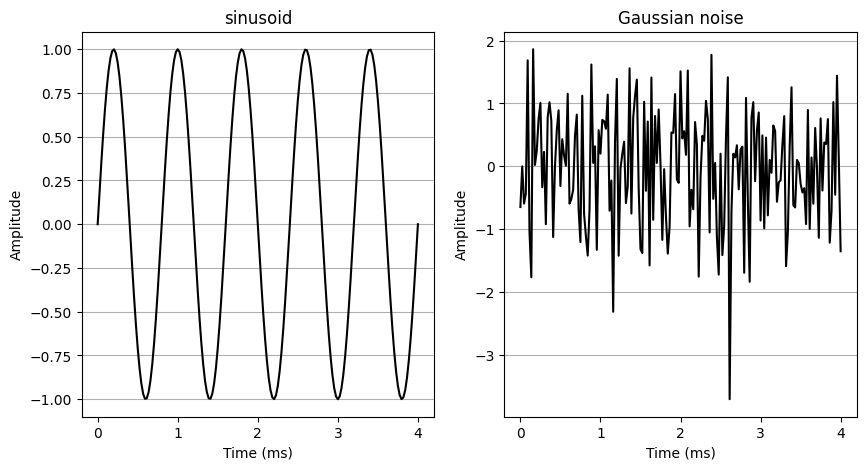

sinusoid: 
 - Zero-crossing rate:  2500.0
 - Energy:  88.0
 - RMS:  0.7051064751106303
 - Log-attack time:  2.2727272727272726e-05
 - Temporal centroid:  0.002
 - Effective duration:  1.0
 - Spectral centroid:  8.747032909988798
 - Spectral spread:  12.769312308506608
 - Spectral variation:  1.4598450057189691
 - Spectral flatness:  0.0011513550623770247
 - Spectral decrease:  0.0008051677393631603

Gaussian noise: 
 - Zero-crossing rate:  22500.0
 - Energy:  149.59788822048327
 - RMS:  0.9193398768438541
 - Log-attack time:  9.09090909090909e-05
 - Temporal centroid:  0.001176487195732364
 - Effective duration:  1.0
 - Spectral centroid:  46.585590791937776
 - Spectral spread:  24.52689427699756
 - Spectral variation:  0.5264909999003865
 - Spectral flatness:  0.009835827235402656
 - Spectral decrease:  0.009693980496130024


In [3]:
fs = 44000 # sampling rate (Hz)
f = 1250 # frequency (Hz)
duration = 5/f # duration (s)


t = np.arange(0, duration, 1/fs) # time (s)
sinusoid = np.sin(2*np.pi*f*t) # signal
noise = np.random.normal(0, 1, len(t)) #gaussian noise


# Plot
fig = plt.figure(figsize=(10, 5)); 
plt.subplot(1,2,1); plt.plot(t*1000, sinusoid, color='black'); plt.xlabel('Time (ms)'); plt.ylabel('Amplitude'); plt.title('sinusoid'); plt.gca().yaxis.grid(True)
plt.subplot(1,2,2); plt.plot(t*1000, noise, color='black'); plt.xlabel('Time (ms)'); plt.ylabel('Amplitude'); plt.title('Gaussian noise');  plt.gca().yaxis.grid(True); plt.show()

#Save figure
fig.savefig('Figures/sine_&_Gnoise.png')


## sinusoid
print('sinusoid: ')

# Zero-crossing rate
zc = np.where(np.diff(np.sign(sinusoid)))[0] # zero-crossing rate
print(' - Zero-crossing rate: ', len(zc)/duration)

# Energy
energy = np.sum(sinusoid**2) # energy
print(' - Energy: ', energy)

# RMS
rms = np.sqrt(np.mean(sinusoid**2)) # RMS
print(' - RMS: ', rms)

# Log-attack time
lat = np.where(sinusoid > 0.01)[0][0] # log-attack time
print(' - Log-attack time: ', lat/fs)

# Temporal centroid
tc = np.sum(t*sinusoid**2)/np.sum(sinusoid**2) # temporal centroid
print(' - Temporal centroid: ', tc)

# Effective duration
ed = np.sum(sinusoid**2)/energy # effective duration
print(' - Effective duration: ', ed)

# Spectral centroid
sinusoid_fft = fft(sinusoid)
sinusoid_fft = sinusoid_fft[:int(len(sinusoid_fft)/2)]
sinusoid_fft = np.abs(sinusoid_fft)
sinusoid_fft = sinusoid_fft/np.sum(sinusoid_fft)
sc = np.sum(sinusoid_fft*np.arange(len(sinusoid_fft))) # spectral centroid
print(' - Spectral centroid: ', sc)

# Spectral spread
ss = np.sqrt(np.sum(sinusoid_fft*(np.arange(len(sinusoid_fft))-sc)**2)) # spectral spread
print(' - Spectral spread: ', ss)

# Spectral variation
sv = ss/sc # spectral variation
print(' - Spectral variation: ', sv)

# Spectral flatness
sf = np.exp(np.mean(np.log(sinusoid_fft))) # spectral flatness
print(' - Spectral flatness: ', sf)

# Spectral decrease
sd = np.sum(np.diff(sinusoid_fft)) # spectral decrease
print(' - Spectral decrease: ', sd)


## Gaussian noise
print('\nGaussian noise: ')
# Zero-crossing rate
zc = np.where(np.diff(np.sign(noise)))[0] # zero-crossing rate
print(' - Zero-crossing rate: ', len(zc)/duration)

# Energy
energy = np.sum(noise**2) # energy
print(' - Energy: ', energy)

# RMS
rms = np.sqrt(np.mean(noise**2)) # RMS
print(' - RMS: ', rms)

# Log-attack time
lat = np.where(noise > 0.01)[0][0] # log-attack time
print(' - Log-attack time: ', lat/fs)

# Temporal centroid
tc = np.sum(t*sinusoid**2)/np.sum(noise**2) # temporal centroid
print(' - Temporal centroid: ', tc)

# Effective duration
ed = np.sum(noise**2)/energy # effective duration
print(' - Effective duration: ', ed)

# Spectral centroid
noise_fft = fft(noise)
noise_fft = noise_fft[:int(len(noise_fft)/2)]
noise_fft = np.abs(noise_fft)
noise_fft = noise_fft/np.sum(noise_fft)
sc = np.sum(noise_fft*np.arange(len(noise_fft))) # spectral centroid
print(' - Spectral centroid: ', sc)

# Spectral spread
ss = np.sqrt(np.sum(noise_fft*(np.arange(len(noise_fft))-sc)**2)) # spectral spread
print(' - Spectral spread: ', ss)

# Spectral variation
sv = ss/sc # spectral variation
print(' - Spectral variation: ', sv)

# Spectral flatness
sf = np.exp(np.mean(np.log(noise_fft))) # spectral flatness
print(' - Spectral flatness: ', sf)

# Spectral decrease
sd = np.sum(np.diff(noise_fft)) # spectral decrease
print(' - Spectral decrease: ', sd)





## Task 2

In [4]:
# Return RMS os a signal
def calculateRMS(signal):
    return np.sqrt(np.mean(signal**2))

#Returns the energy of a signal
def calculateEnergy(signal):
    return np.sum(signal**2)

# Returns the zero-crossing rate of a signal
def calculateZCR(signal):
    return len(np.where(np.diff(np.sign(signal)))[0])/len(signal)

# Returns the log-attack time of a signal
def calculateLAT(signal):
    return np.where(signal > 0.01)[0][0]/fs

# Returns the temporal centroid of a signal
def calculateTC(signal, fs):
    t = np.arange(len(signal)) / fs
    return np.sum(t * signal**2) / np.sum(signal**2)
    
# Returns the effective duration of a signal
def calculateED(signal):
    return np.sum(signal**2)/np.sum(signal**2)   

# Returns the Spectral centroid of a signal
def calculateSC(signal):
    signal_fft = fft(signal)
    signal_fft = signal_fft[:int(len(signal_fft)/2)]
    signal_fft = np.abs(signal_fft)
    signal_fft = signal_fft/np.sum(signal_fft)
    return np.sum(signal_fft*np.arange(len(signal_fft)))

# Returns the Spectral spread of a signal
def calculateSS(signal):
    sc = calculateSC(signal)
    signal_fft = fft(signal)
    signal_fft = signal_fft[:int(len(signal_fft)/2)]
    signal_fft = np.abs(signal_fft)
    signal_fft = signal_fft/np.sum(signal_fft)
    return np.sqrt(np.sum(signal_fft*(np.arange(len(signal_fft))-sc)**2))

# Returns the Spectral variation of a signal
def calculateSV(signal):
    return calculateSS(signal)/calculateSC(signal)

# Returns the Spectral flatness of a signal
def calculateSF(signal):
    signal_fft = fft(signal)
    signal_fft = signal_fft[:int(len(signal_fft)/2)]
    signal_fft = np.abs(signal_fft)
    signal_fft = signal_fft/np.sum(signal_fft)
    return np.exp(np.mean(np.log(signal_fft)))

# Returns the Spectral decrease of a signal
def calculateSD(signal):
    signal_fft = fft(signal)
    signal_fft = signal_fft[:int(len(signal_fft)/2)]
    signal_fft = np.abs(signal_fft)
    signal_fft = signal_fft/np.sum(signal_fft)
    return np.sum(np.diff(signal_fft))

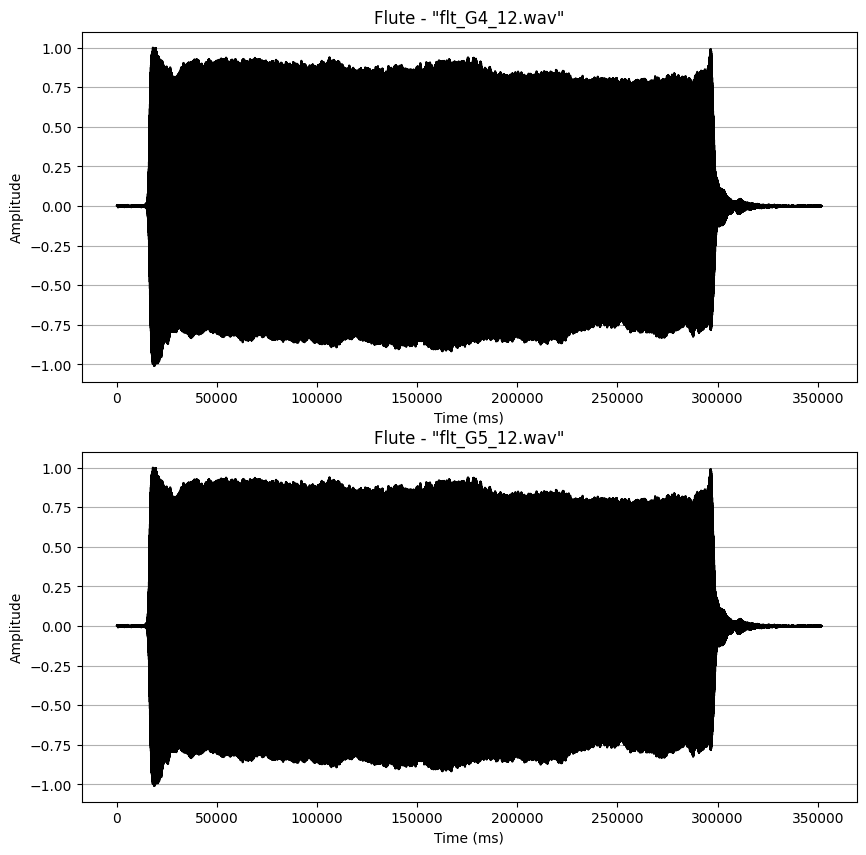

flute: 
RMS:  0.5685794561726876 
Energy:  113743.74927385639 
ZCR:  0.04018303774442929 
LAT:  0.331859410430839 
TC:  3.576395387916333 
ED:  1.0 
SC:  20198.817959868946 
SS:  29986.59666329013 
SV:  1.4845718557822325 
SF:  8.259992513559941e-07 
SD:  -3.814532635364176e-05


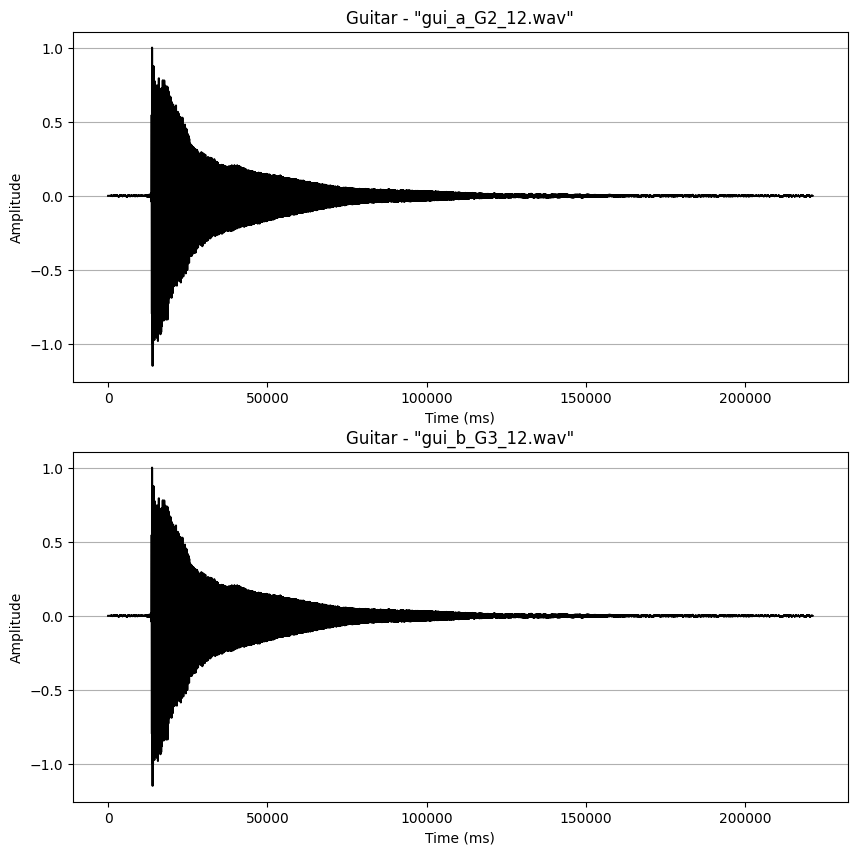

Guitar: 
RMS:  0.11912159918722315 
Energy:  3138.974222423545 
ZCR:  0.026309722391743628 
LAT:  0.30374149659863947 
TC:  0.5368000631472369 
ED:  1.0 
SC:  4343.3017656679085 
SS:  7942.781535231641 
SV:  1.8287427316278606 
SF:  2.404450329298088e-07 
SD:  -1.4815778439814904e-06


In [5]:
# Flute
fs, signal = wavfile.read('InstrumentalSounds_FULL/flt_G4_12.wav') # Clarinet
fs2, signal2 = wavfile.read('InstrumentalSounds_FULL/flt_G5_12.wav') # Clarinet
signal = signal/np.max(signal) # normalize signal
fig = plt.figure(figsize=(10, 10)); 
plt.subplot(2, 1, 1); plt.plot(signal, color='black'); plt.xlabel('Time (ms)'); plt.ylabel('Amplitude'); plt.title('Flute - "flt_G4_12.wav"'); plt.gca().yaxis.grid(True)
plt.subplot(2, 1, 2); plt.plot(signal, color='black'); plt.xlabel('Time (ms)'); plt.ylabel('Amplitude'); plt.title('Flute - "flt_G5_12.wav"'); plt.gca().yaxis.grid(True); plt.show()

print('flute: \nRMS: ', calculateRMS(signal), '\nEnergy: ', calculateEnergy(signal), '\nZCR: ', calculateZCR(signal), '\nLAT: ', calculateLAT(signal), '\nTC: ', calculateTC(signal, fs), '\nED: ', calculateED(signal), '\nSC: ', calculateSC(signal), '\nSS: ', calculateSS(signal), '\nSV: ', calculateSV(signal), '\nSF: ', calculateSF(signal), '\nSD: ', calculateSD(signal))

# Guitar
fs, signal = wavfile.read('InstrumentalSounds_FULL/gui_a_G2_12.wav') # Guitar
fs, signal = wavfile.read('InstrumentalSounds_FULL/gui_b_G3_12.wav') # Same note, diferent guitar
signal = signal/np.max(signal) # normalize signal
fig = plt.figure(figsize=(10, 10)); 
plt.subplot(2, 1, 1); plt.plot(signal, color='black'); plt.xlabel('Time (ms)'); plt.ylabel('Amplitude'); plt.title('Guitar - "gui_a_G2_12.wav"'); plt.gca().yaxis.grid(True)
plt.subplot(2, 1, 2); plt.plot(signal, color='black'); plt.xlabel('Time (ms)'); plt.ylabel('Amplitude'); plt.title('Guitar - "gui_b_G3_12.wav"'); plt.gca().yaxis.grid(True); plt.show()

print('Guitar: \nRMS: ', calculateRMS(signal), '\nEnergy: ', calculateEnergy(signal), '\nZCR: ', calculateZCR(signal), '\nLAT: ', calculateLAT(signal), '\nTC: ', calculateTC(signal, fs), '\nED: ', calculateED(signal), '\nSC: ', calculateSC(signal), '\nSS: ', calculateSS(signal), '\nSV: ', calculateSV(signal), '\nSF: ', calculateSF(signal), '\nSD: ', calculateSD(signal))




## Task 6

In [6]:
# Create dataset


# Load several files and create a dataset
def createDataset(path):
    dataset = pd.DataFrame(columns=['RMS', 'Energy', 'ZCR', 'LAT', 'TC', 'ED', 'SC', 'SS', 'SV', 'SF', 'SD', 'Instrument'])
    for file in os.listdir(path):
        intrument= file.split('_')[0]
        fs, signal = wavfile.read(path + file)
        signal = signal/np.max(signal)
        row = [calculateRMS(signal), calculateEnergy(signal), calculateZCR(signal), calculateLAT(signal), calculateTC(signal, fs), calculateED(signal), calculateSC(signal), calculateSS(signal), calculateSV(signal), calculateSF(signal), calculateSD(signal), intrument]
        dataset.loc[len(dataset)] = row
    return dataset

# Create dataset
dataset = createDataset('InstrumentalSounds_FULL/')

# Save dataset
dataset.to_csv('dataset.csv', index=False)


In [93]:
# classification


# Split dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train model
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Print all labels
print("Labels: ", classifier.classes_)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = classifier.classes_)
print("Confusion Matrix:\n", cm)


# Accuracy
print("\n", accuracy_score(y_test, y_pred))


Labels:  ['acc' 'cbs' 'clr' 'flt' 'gui' 'hrp' 'sax' 'trb' 'trp' 'tub' 'vcl' 'vln']
Confusion Matrix:
 [[2 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]

 0.5714285714285714
